In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("spotify.csv", encoding='ISO-8859-1')

In [3]:
print(df.shape)

(149860, 11)


In [4]:
print(df.columns)

Index(['spotify_track_uri', 'ts', 'platform', 'ms_played', 'track_name',
       'artist_name', 'album_name', 'reason_start', 'reason_end', 'shuffle',
       'skipped'],
      dtype='object')


In [5]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,08-07-2013 02:44,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,08-07-2013 02:45,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,08-07-2013 02:50,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,08-07-2013 02:52,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,08-07-2013 03:17,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

In [8]:
df['reason_start'] = df['reason_start'].fillna(df['reason_start'].mode()[0])
df['reason_end'] = df['reason_end'].fillna(df['reason_end'].mode()[0])

In [9]:
df.isnull().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

In [10]:
df['ts'] = pd.to_datetime(df['ts'], dayfirst=True)
df['year'] = df['ts'].dt.year
df['hour'] = df['ts'].dt.hour
df['dayofweek'] = df['ts'].dt.dayofweek

Which artist did they listen to the most this year? Is it the same as last year? 

Top artist each year:


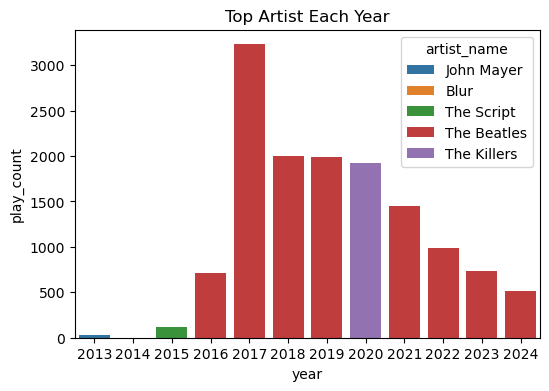

In [11]:
artist_yearly = df.groupby(['year', 'artist_name']).size().reset_index(name='play_count')

top_artist_each_year = artist_yearly.sort_values(['year', 'play_count'], ascending=[True, False]).drop_duplicates('year')

print("Top artist each year:")
plt.figure(figsize=(6,4))
sns.barplot(
    data=top_artist_each_year,
    x='year',
    y='play_count',
    hue='artist_name',
    dodge=False
)
plt.title("Top Artist Each Year")
plt.show()

Which songs have they played the most? How often do they skip them?

In [12]:
song_summary = df.groupby('track_name').agg(
    plays=('track_name', 'count'),
    skips=('skipped', 'sum')
)

song_summary['skip_rate (%)'] = ((song_summary['skips'] / song_summary['plays']) * 100).round(2)

top_songs = song_summary.sort_values('plays', ascending=False).head(10)

print("Top 10 most played songs and their skip rate:")
print(top_songs)

Top 10 most played songs and their skip rate:
                                   plays  skips  skip_rate (%)
track_name                                                    
Ode To The Mets                      203      1           0.49
In the Blood                         180      1           0.56
Dying Breed                          165      2           1.21
Caution                              153      2           1.31
19 Dias y 500 Noches - En Directo    146      5           3.42
Concerning Hobbits                   141      7           4.96
All These Things That I've Done      134      3           2.24
The Boxer                            134      5           3.73
Come Together - Remastered 2009      133      2           1.50
Yesterday - Remastered 2009          132      1           0.76


How often do they explore new artists vs replaying favorite

New artist plays: 4112 (2.78%)
Repeat artist plays: 143966 (97.22%)


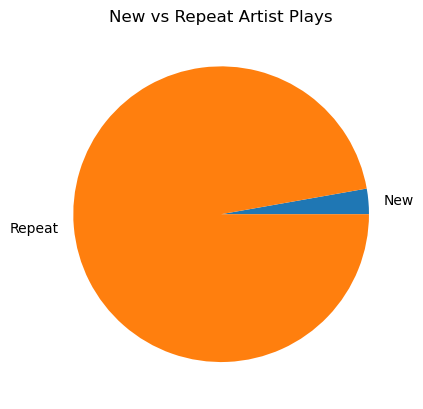

In [13]:
df = df.sort_values('ts')

repeat_artist_plays = df['artist_name'].duplicated().sum()
new_artist_plays = len(df) - repeat_artist_plays

print(f"New artist plays: {new_artist_plays} ({new_artist_plays/len(df):.2%})")
print(f"Repeat artist plays: {repeat_artist_plays} ({repeat_artist_plays/len(df):.2%})")

plt.title("New vs Repeat Artist Plays")
plt.pie([new_artist_plays, repeat_artist_plays], labels=['New', 'Repeat'])
plt.show()

In [14]:
df = df.drop(['spotify_track_uri', 'ts', 'track_name', 'artist_name', 'album_name'], axis=1)

In [15]:
df['shuffle'] = LabelEncoder().fit_transform(df['shuffle'])
df['skipped'] = LabelEncoder().fit_transform(df['skipped'])

df = pd.get_dummies(df, columns=['platform', 'reason_start', 'reason_end'])

In [16]:
X = df.drop('skipped', axis=1)
y = df['skipped']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9942598595353863
Precision: 0.9365079365079365
Recall: 0.9546925566343042
F1-score: 0.9455128205128205


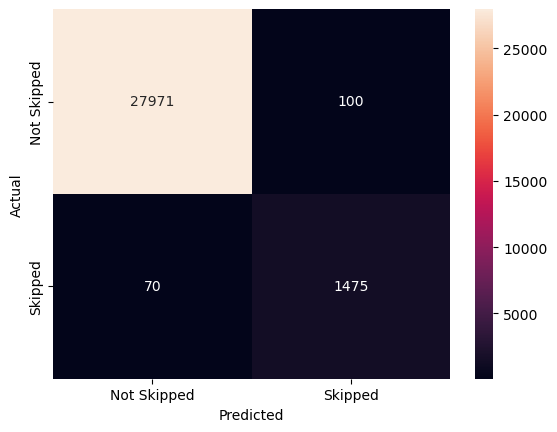

In [17]:
dt = DecisionTreeClassifier(random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Skipped', 'Skipped'], yticklabels=['Not Skipped', 'Skipped'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\Riya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9482712047541869
Precision: 0.6101694915254238
Recall: 0.02330097087378641
F1-score: 0.04488778054862843


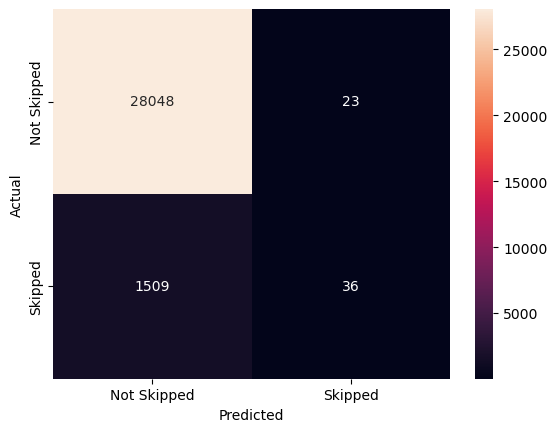

In [18]:
lr = LogisticRegression(max_iter=5000, random_state=42)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Not Skipped', 'Skipped'], yticklabels=['Not Skipped', 'Skipped'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.9958806050783361
Precision: 0.9810682893847193
Recall: 0.9391585760517799
F1-score: 0.9596560846560847


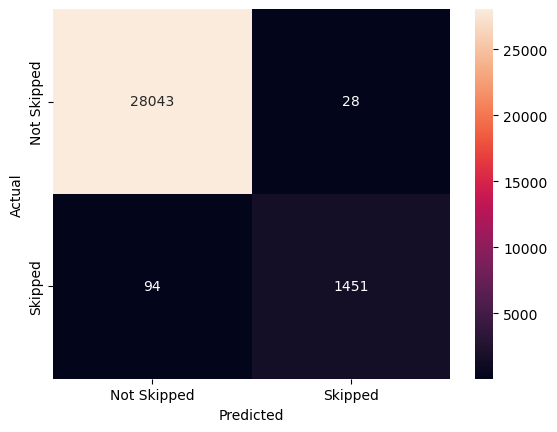

In [19]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Not Skipped', 'Skipped'], 
            yticklabels=['Not Skipped', 'Skipped'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy: 0.9944962182603998
Precision: 0.9907670454545454
Recall: 0.9029126213592233
F1-score: 0.9448018963765662


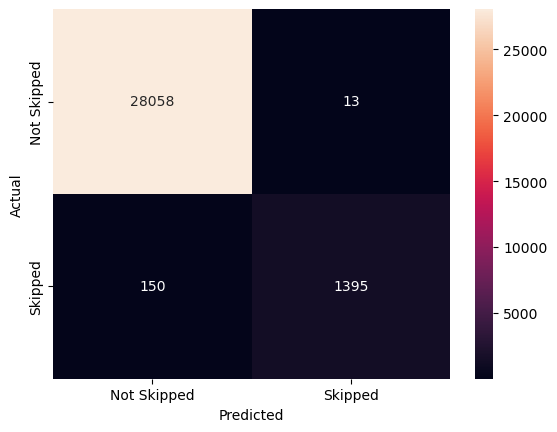

In [20]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=['Not Skipped', 'Skipped'],
            yticklabels=['Not Skipped', 'Skipped'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##  Conclusion

- If the goal is **general analysis**, we focus on the **F1 Score** since it balances both Precision and Recall.  
  In this case, the **Random Forest Classifier** is the best choice.  

- If the goal is building a **Recommendation System**, we focus on **Precision** (to avoid wrongly predicting skips).  
  Here, **Gradient Boosting** performs better.  

- If the goal is to study **User Engagement Patterns**, we focus on **Recall** (to capture as many actual skips as possible).  
  For this, the **Decision Tree Classifier** is most suitable.  
